In [1]:
%load_ext autoreload
%autoreload 2


import os
import sys
import glob
import torch
import json
import pandas as pd
import time
import qgrid
import torch


from pytorch_utils.logging import LoggerReader
from pytorch_utils.collection_utils import keychain_value_iter
from collections import defaultdict, OrderedDict
from pathlib import Path
from IPython.display import display

import matplotlib.pyplot as plt
import matplotlib
# import mpld3
# mpld3.enable_notebook()
%matplotlib inline

In [2]:
root = Path('/tmp/testing')

In [3]:
args_white_list = {
 'lr_init',
 'weight_decay',
}

stats_white_list = {
    'acc_train', 
    'acc_test', 
}

tag = None


def load_results():
    global RESULTS
    RESULTS = [LoggerReader(r) for r in glob.glob(str(root / '*'))]
    
    if tag is not None:
        RESULTS = [r for r in RESULTS if r.experiment_args['tag'] == tag]
        
    RESULTS = sorted(RESULTS, key=lambda x: x.date)

def args_df_from_results():
    load_results()
    R = []
    
    for i, r in enumerate(RESULTS):
        
        df = {k: str(v) if isinstance(v, (list, tuple)) else v for  k, v in r.experiment_args.items() if k in args_white_list}
        df['date'] = r.date
        df = pd.DataFrame(df, index=[i])       
        
        R.append(df)   
        
    return pd.concat(R, sort=False)

def df_from_results():
    A = args_df_from_results()
    
    tmp = []
    for i, r in enumerate(RESULTS):
        df = {}
        for k in ['acc_train', 'acc_test']:
            df[k] = np.mean([run[k][-1] for run in r])
            
        tmp.append(pd.DataFrame(df, index=[i]))
    
    B = pd.concat(tmp, sort=False)
    return A.join(B) 

In [4]:
args_df_from_results()

,lr_init,weight_decay,date
0,0.01,0.001,2020-03-09 11:18:36


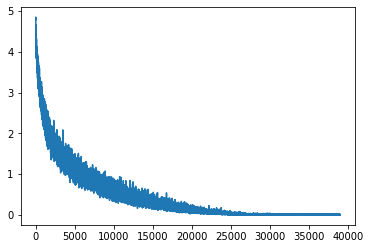

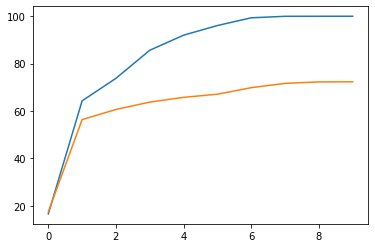

In [7]:
plt.figure()
plt.plot(RESULTS[0][0]['batch_loss'])

plt.figure()
plt.plot(RESULTS[0][0]['acc_train'])
plt.plot(RESULTS[0][0]['acc_test'])

In [6]:
qgrid_widget = qgrid.show_grid(df_from_results(), show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…